In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
le = LabelEncoder()


In [2]:
df = pd.read_csv('weather_classification_data.csv')
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


1. Temperature (Температура) - значение температуры воздуха, скорее всего в градусах Цельсия или Фаренгейта.

2. Humidity (Влажность) - относительная влажность воздуха, выраженная в процентах.

3. Wind Speed (Скорость ветра) - скорость ветра, измеряемая в метрах в секунду или километрах в час.

4. Precipitation (%) (Осадки в %) - процент вероятности осадков в данном регионе за определённый период времени.

5. Cloud Cover (Облачность) - процент облачного покрова в небе.

6. Atmospheric Pressure (Атмосферное давление) - атмосферное давление, обычно выраженное в миллибарах или миллиметрах ртутного столба.

7. UV Index (Индекс УФ-излучения) - показатель уровня ультрафиолетового излучения, который может влиять на здоровье, особенно на кожу.

8. Season (Сезон) - время года, которое может быть представлено, например, как "зима", "весна", "лето" и "осень".

9. Visibility (km) (Видимость) - расстояние, на котором можно различить объект, измеряемое в километрах.

10. Location (Местоположение) - географическая информация о месте, где были собраны данные. Это может быть название города, региона или координаты.

11. Weather Type (Тип погоды) - категория погоды, описывающая текущие условия, такие как "солнечно", "дождливо
", "облачно" и т. д.

Считываем данные из CSV-файла. Выведем первые строки для проверки структуры и содержимого.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Используем метод `info()`, чтобы получить информацию о типах данных, количестве строк и наличии пропусков.

In [10]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

`Проверяются пропуски в данных для каждого столбца. Выводится количество отсутствующих значений.`

In [13]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

Выводится список названий столбцов для понимания структуры таблицы.

In [16]:
df['Season'].value_counts()

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [18]:
df["UV Index"].value_counts().sort_index()

UV Index
0     2097
1     2837
2     1465
3     1432
4      831
5      591
6      524
7      543
8      532
9      572
10     577
11     582
12     218
13     189
14     210
Name: count, dtype: int64

In [20]:
df['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [26]:
df = df.drop_duplicates()

In [100]:
print(df['Weather Type'].unique())

[1 0 3 2]


In [31]:
df["Weather Type"].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

`value_counts() — подсчитывает количество уникальных значений в столбце.
Анализируются сезоны, индексы УФ-излучения и облачность для определения их распределения.`

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'Precipitation (%)'}>,
        <Axes: title={'center': 'Atmospheric Pressure'}>,
        <Axes: title={'center': 'UV Index'}>],
       [<Axes: title={'center': 'Visibility (km)'}>, <Axes: >, <Axes: >]],
      dtype=object)

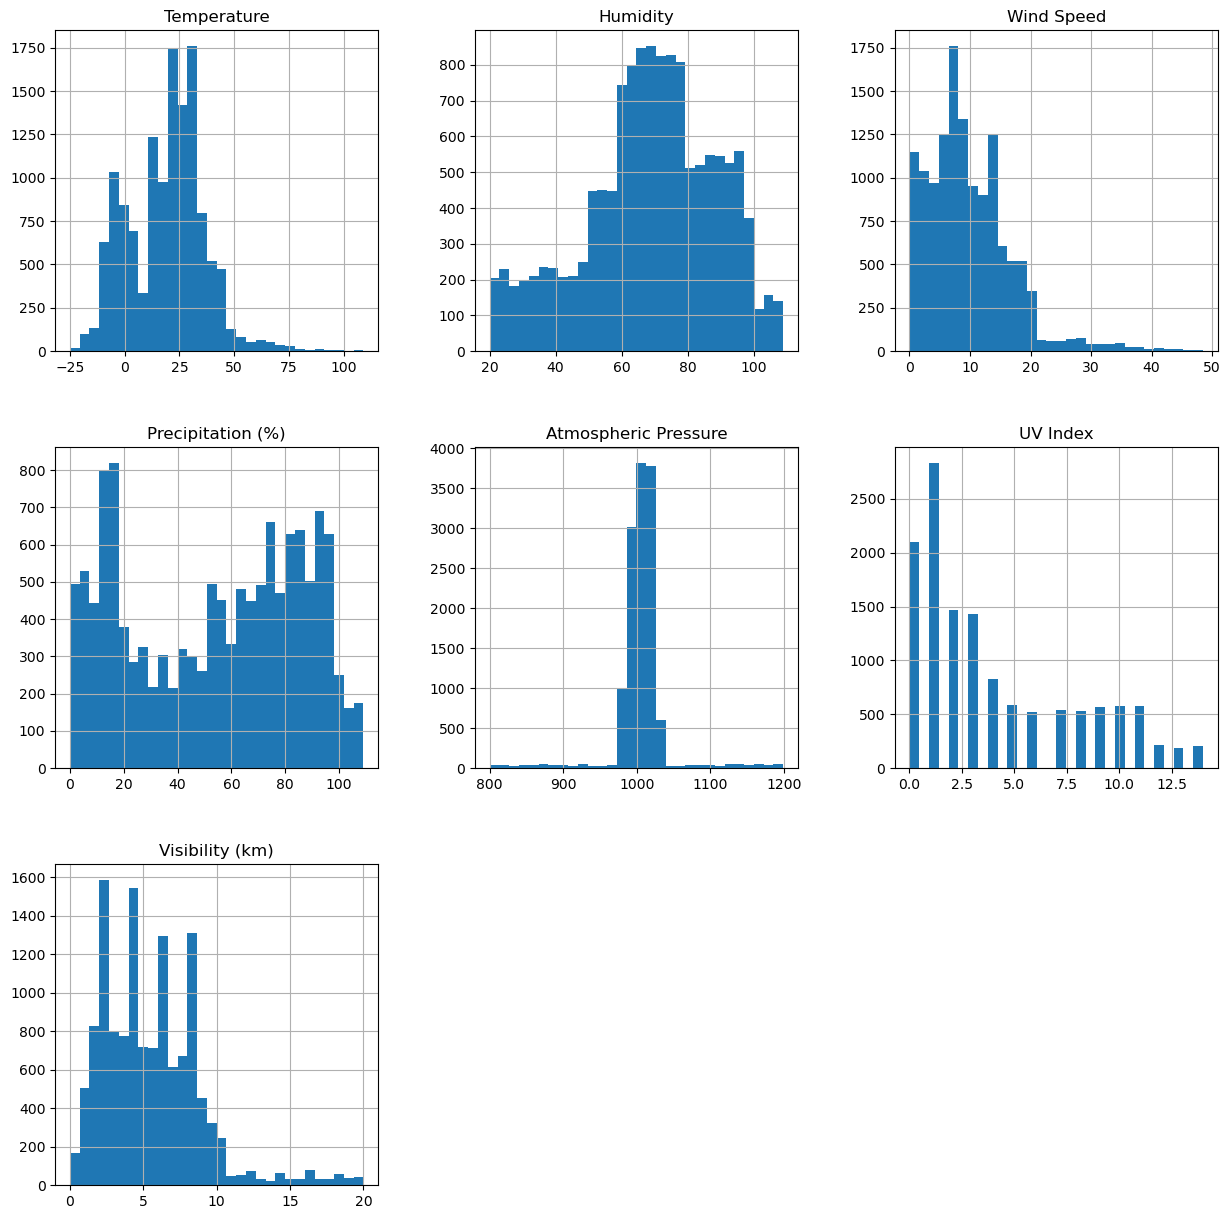

In [38]:
df.hist(bins=30, figsize=(15,15))

Создаются гистограммы для визуального анализа распределения значений по каждому числовому столбцу.

In [98]:
df['Season']=le.fit_transform(df[['Season']])
df['Location']=le.fit_transform(df[['Location']])
df['Cloud Cover']=le.fit_transform(df[['Cloud Cover']])
df['Weather Type']=le.fit_transform(df[['Weather Type']])
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location']]
y = df['Weather Type']
df['Weather Type']=le.fit_transform(df[['Weather Type']])



[1 0 3 2]


Кодируются текстовые данные (например, сезоны и локации) в числовую форму с помощью LabelEncoder.
Создаются входные данные X и метки y для последующего обучения модели.

<Axes: >

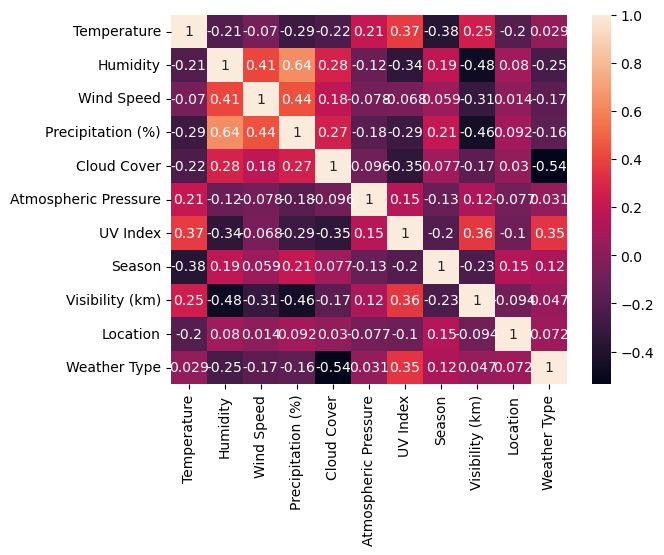

In [42]:
sns.heatmap(df.corr(),annot=True)

Создаётся тепловая карта для анализа корреляции между признаками.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [86]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train,y_train)
print('train',model1.score(X_train,y_train))
print('test',model1.score(X_test,y_test))
y_predict = model1.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
print(classification_report(y_predict, y_test))
print(cm)

train 0.8375541125541126
test 0.8348484848484848
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       876
           1       0.84      0.80      0.82      1055
           2       0.92      0.89      0.91      1002
           3       0.85      0.81      0.83      1027

    accuracy                           0.83      3960
   macro avg       0.84      0.84      0.83      3960
weighted avg       0.84      0.83      0.84      3960

[[739 122  29 117]
 [ 76 839  47  34]
 [ 14  20 895  43]
 [ 47  74  31 833]]


In [88]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train,y_train)
print('train',model2.score(X_train,y_train))
print('test',model2.score(X_test,y_test))
y_predict = model2.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
print(classification_report(y_predict, y_test))
print(cm)

train 1.0
test 0.9032828282828282
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1002
           1       0.90      0.89      0.90      1003
           2       0.92      0.93      0.93       953
           3       0.92      0.90      0.91      1002

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

[[885  59  23  40]
 [ 56 895  21  24]
 [ 27  22 891  32]
 [ 34  27  18 906]]


In [94]:
model3 = KNeighborsClassifier()
model3.fit(X_train,y_train)
print('train',model3.score(X_train,y_train))
print('test',model3.score(X_test,y_test))
y_predict = model3.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
print(classification_report(y_predict, y_test))
print(cm)

train 0.9241341991341991
test 0.8901515151515151
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       998
           1       0.90      0.84      0.87      1065
           2       0.92      0.94      0.93       946
           3       0.89      0.92      0.91       951

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

[[858  93  18  38]
 [ 62 897  17  20]
 [ 30  35 892  15]
 [ 48  40  19 878]]


In [92]:
model4 = RandomForestClassifier(max_depth=10, random_state=42)
model4.fit(X_train,y_train)
print('train',model4.score(X_train,y_train))
print('test',model4.score(X_test,y_test))
y_predict = model4.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
print(classification_report(y_predict, y_test))
print(cm)

train 0.9925324675324675
test 0.9146464646464646
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1019
           1       0.93      0.89      0.91      1044
           2       0.92      0.95      0.93       939
           3       0.91      0.94      0.93       958

    accuracy                           0.91      3960
   macro avg       0.91      0.92      0.92      3960
weighted avg       0.91      0.91      0.91      3960

[[904  66  19  18]
 [ 44 926  10  16]
 [ 31  25 892  24]
 [ 40  27  18 900]]


In [66]:
scores = cross_val_score(model1, X, y, cv=5)
print("CV Accuracy: ", scores.mean())

CV Accuracy:  0.8453787878787878


In [67]:
scores = cross_val_score(model2, X, y, cv=5)
print("CV Accuracy: ", scores.mean())

CV Accuracy:  0.9057575757575757


In [68]:
scores = cross_val_score(model3, X, y, cv=5)
print("CV Accuracy: ", scores.mean())

CV Accuracy:  0.8887121212121212


In [69]:
scores = cross_val_score(model4, X, y, cv=5)
print("CV Accuracy: ", scores.mean())

CV Accuracy:  0.9134848484848485


Каждая модель обучается, выводится точность на обучающем и тестовом наборах, а также строится матрица ошибок.

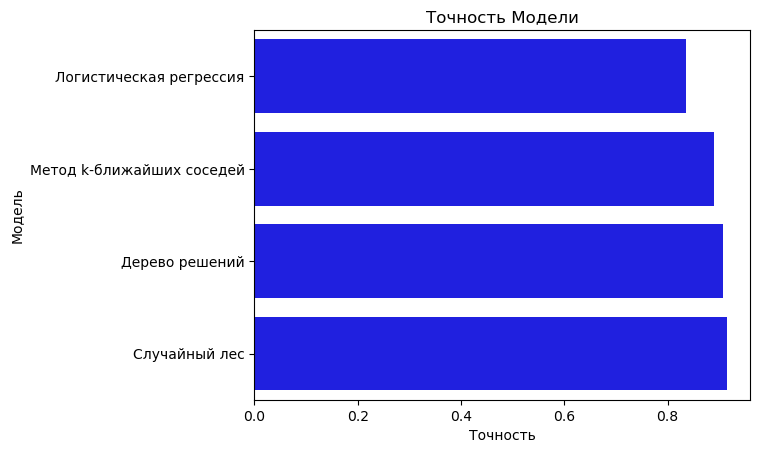

In [56]:
classifiers =["Логистическая регрессия", "Дерево решений", "Метод k-ближайших соседей", "Случайный лес"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [model1.score(X_test,y_test), model2.score(X_test,y_test), model3.score(X_test,y_test), model4.score(X_test,y_test)]
plt.xlabel('Точность')
plt.ylabel('Модель')
plt.title('Точность Модели')

sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

Создаётся сравнительный график точности моделей.

*ВЫВОД*

Были обучены и протестированы следующие модели:

1. Логистическая регрессия.

2. Дерево решений.

3. Метод k-ближайших соседей.

4. Случайный лес.

Для каждой модели были рассчитаны точности на обучающем и тестовом наборах.
Построена матрица ошибок для анализа предсказаний.
Сравнение моделей по точности визуализировано в виде столбчатой диаграммы.

RandomForest и DecisionTree показали более высокую точность, чем другие модели, особенно на тестовых данных.
